<a href="https://colab.research.google.com/github/zzheng2020/ID2222-Data-Mining/blob/main/Homework4_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import networkx as nx
from sklearn.cluster import KMeans

In [2]:
data_file = 'example1.dat'

In [3]:
import networkx as nx
def load_graph(file: str, weight: bool = False) -> nx.Graph:
    if weight:
        return nx.read_weighted_edgelist(
            path=file,
            delimiter=','
        )
    else:
        return nx.read_edgelist(
            path=file,
            delimiter=','
        )

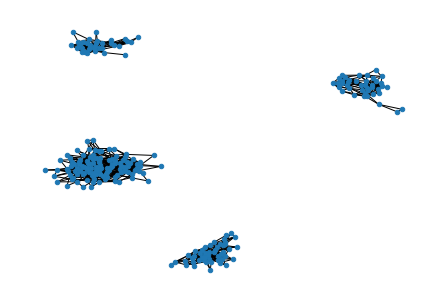

In [4]:
graph = load_graph(data_file)
nx.draw(graph, node_size=20)
plt.show()

In [5]:
list(graph.neighbors('1'))

['2', '3', '4', '5', '6', '7', '72']

In [6]:
k = 4
A = nx.to_numpy_array(graph)
D = np.diagflat(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = D_inv @ A @ D_inv
w, v = np.linalg.eigh(L) # w: eigenvalues, v: eigenvectors

# The column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. 
X = v[:, -k:]

# default: Frobenius norm
Y = X / np.linalg.norm(X, axis=1, keepdims=True)

res = KMeans(n_clusters=k).fit(Y).labels_
res

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [7]:
values, vectors = np.linalg.eigh(D-A)

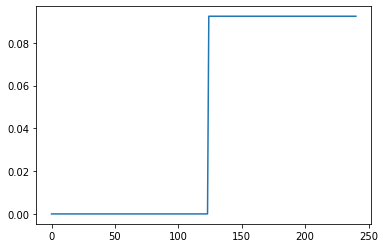

In [11]:
plt.plot(np.sort(vectors[:, 1]))

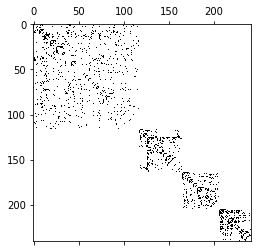

In [13]:
plt.spy(A);

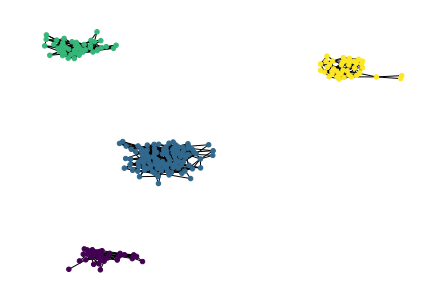

In [14]:
nx.draw(graph, node_size=20, node_color=res)

In [15]:
data_file2 = 'example2.dat'

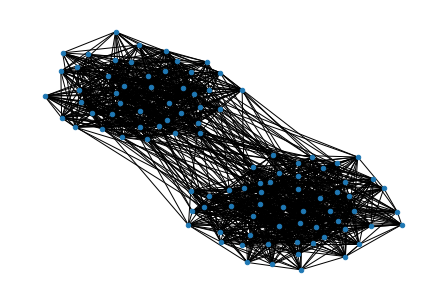

In [18]:
graph = load_graph(data_file2, weight=True)
nx.draw(graph, node_size=20)
plt.show()

In [22]:
k = 2
A = nx.to_numpy_array(graph)
D = np.diagflat(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = D_inv @ A @ D_inv
w, v = np.linalg.eigh(L) # w: eigenvalues, v: eigenvectors

# The column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. 
X = v[:, -k:]

# default: Frobenius norm
Y = X / np.linalg.norm(X, axis=1, keepdims=True)

res = KMeans(n_clusters=k).fit(Y).labels_
res

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

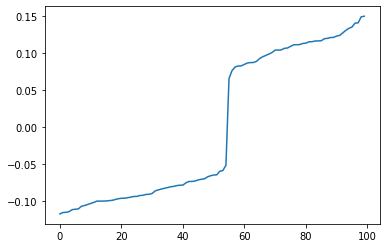

In [23]:
values, vectors = np.linalg.eigh(D-A)
plt.plot(np.sort(vectors[:, 1]))

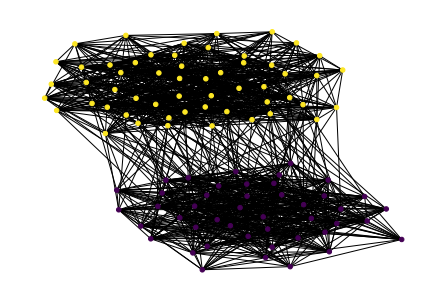

In [24]:
nx.draw(graph, node_size=20, node_color=res)

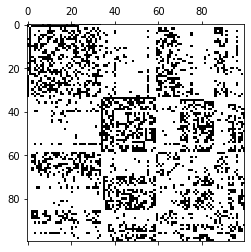

In [25]:
plt.spy(A);